In [1]:
%load_ext autoreload
%autoreload 2

%reload_ext XTIPython

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

You can now access BridgeLib, ImarisLib, vImaris, vDataSet, vScene and vFactory


# Load the algae dataset and track the algae

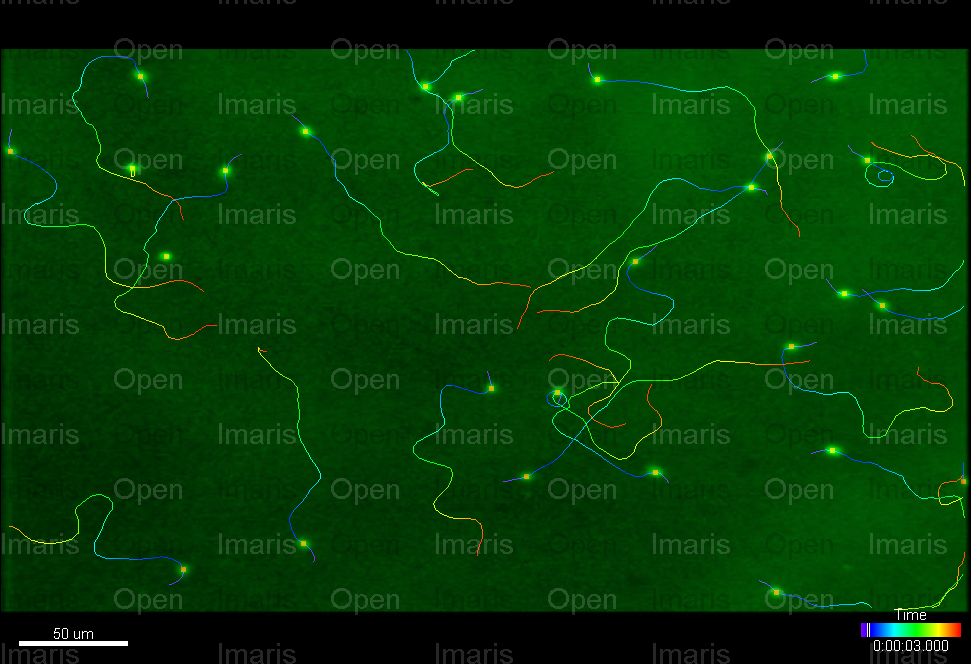

In [136]:
%imaris_screenshot

# Pull the spots and first spots object

In [3]:
%imaris_pull spots

['Spots 1']

In [6]:
vSpot = spots.values()[0]

# Getting Track Ids for vSpot
The following BridgeLib function returns a list of all the track ids for an object (e.g. a spot or a surface)

In [38]:
track_ids = BridgeLib.GetItemTrackIds(vSpot)
track_ids

array([1000000028, 1000000029, 1000000034, 1000000047, 1000000048,
       1000000053, 1000000063, 1000000065, 1000000069, 1000000074,
       1000000075, 1000000077, 1000000079, 1000000083, 1000000086,
       1000000087, 1000000088, 1000000089, 1000000091, 1000000093,
       1000000094, 1000000095, 1000000096, 1000000098, 1000000103,
       1000000332, 1000000854, 1000002130, 1000002972, 1000003079,
       1000003223], dtype=int64)

# Getting Spot Ids for a track
For a particular track id, BridgeLib can then return an array of the spot ids in the track. These are ordered by timepoint.

In [39]:
BridgeLib.GetItemIds(vSpot,track_ids[0])

array([  0,  25,  51,  76, 102, 128, 154, 180, 205, 231, 257, 283, 308,
       333, 357, 382, 406, 430, 453, 476, 499, 522, 544, 565, 586, 608,
       630, 652, 673, 694, 715, 737, 758, 780, 801, 822, 844, 866, 889,
       913], dtype=int64)

# Getting the XYZT values for all the spots
Here we get an array of X,Y,Z,T values for all the detected spots. The array index can be matched from the indexes returned by BridgeLib.GetItemIds().

physdim = True is to get physical dimensions rather than pixel / subpixel / time indexes

In [41]:
arr = BridgeLib.GetItemXYZT(vImaris,vSpot,physdim=True)

# Get the XYZT positions from arr for a particular track

In [53]:
arr[BridgeLib.GetItemIds(vSpot,track_ids[-1])]

array([(445.30087, 258.11697, 0.5, 33.), (445.01526, 260.24847, 0.5, 34.),
       (444.34244, 263.42993, 0.5, 35.), (443.3317 , 266.54437, 0.5, 36.),
       (441.30966, 268.39514, 0.5, 37.), (436.67993, 269.81268, 0.5, 38.),
       (433.20956, 271.40643, 0.5, 39.), (430.8379 , 273.10373, 0.5, 40.),
       (426.8876 , 274.54822, 0.5, 41.), (424.70462, 276.60223, 0.5, 42.),
       (422.55774, 279.98383, 0.5, 43.), (420.26175, 282.14   , 0.5, 44.)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('t', '<f4')])

# Plot the tracks (no particular colour coding)
To plot the tracks, we iterate through the track ids and fetch the X,Y (and possibly Z) values according to the spot ids constituting the tracks.

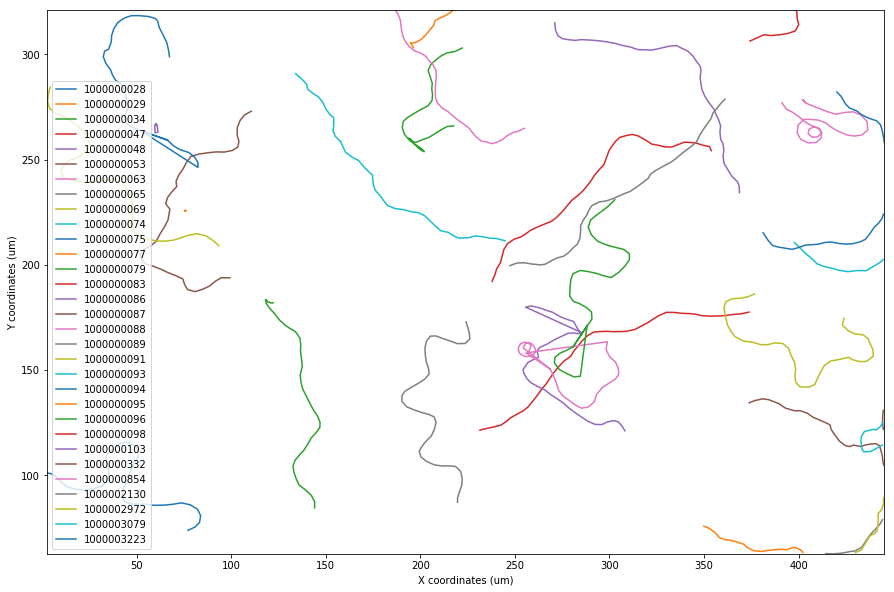

In [37]:
track_ids = BridgeLib.GetItemTrackIds(vSpot)
arr = BridgeLib.GetItemXYZT(vImaris,vSpot,physdim=True)

xmi = np.min(arr['x'])
xma = np.max(arr['x'])
ymi = np.min(arr['y'])
yma = np.max(arr['y'])
    
fig, ax = plt.subplots(1, 1,figsize=(15,10))

for tid in track_ids:
    idx = BridgeLib.GetItemIds(vSpot,tid)
    #values = subset["Value"][idx]
    #ti = subset["Time"][idx]
    xyzt = arr[BridgeLib.GetItemIds(vSpot,tid)]
    
    ax.plot(xyzt['x'],xyzt['y'],label='%d'%(tid))

ax.set_xlabel('X coordinates (um)')
ax.set_ylabel('Y coordinates (um)')

ax.set_xlim(xmi,xma)
ax.set_ylim(ymi,yma)

ax.legend()
plt.show()


In [50]:
#https://stackoverflow.com/questions/4694478/center-origin-in-matplotlib

import matplotlib as mpl
import matplotlib.patheffects

def center_spines(ax=None, centerx=0, centery=0):
    """Centers the axis spines at <centerx, centery> on the axis "ax", and
    places arrows at the end of the axis spines."""
    if ax is None:
        ax = plt.gca()

    # Set the axis's spines to be centered at the given point
    # (Setting all 4 spines so that the tick marks go in both directions)
    ax.spines['left'].set_position(('data', centerx))
    ax.spines['bottom'].set_position(('data', centery))
    ax.spines['right'].set_position(('data', centerx - 1))
    ax.spines['top'].set_position(('data', centery - 1))

    # Hide the line (but not ticks) for "extra" spines
    for side in ['right', 'top']:
        ax.spines[side].set_color('none')

    # On both the x and y axes...
    for axis, center in zip([ax.xaxis, ax.yaxis], [centerx, centery]):
        # Turn on minor and major gridlines and ticks
        axis.set_ticks_position('both')
        axis.grid(True, 'major', ls='solid', lw=0.5, color='gray')
        axis.grid(True, 'minor', ls='solid', lw=0.1, color='gray')
        axis.set_minor_locator(mpl.ticker.AutoMinorLocator())

        # Hide the ticklabels at <centerx, centery>
        formatter = CenteredFormatter()
        formatter.center = center
        axis.set_major_formatter(formatter)

    # Add offset ticklabels at <centerx, centery> using annotation
    # (Should probably make these update when the plot is redrawn...)
    xlabel, ylabel = map(formatter.format_data, [centerx, centery])
    ax.annotate('(%s, %s)' % (xlabel, ylabel), (centerx, centery),
            xytext=(-4, -4), textcoords='offset points',
            ha='right', va='top')

class CenteredFormatter(mpl.ticker.ScalarFormatter):
    """Acts exactly like the default Scalar Formatter, but yields an empty
    label for ticks at "center"."""
    center = 0
    def __call__(self, value, pos=None):
        if value == self.center:
            return ''
        else:
            return mpl.ticker.ScalarFormatter.__call__(self, value, pos)

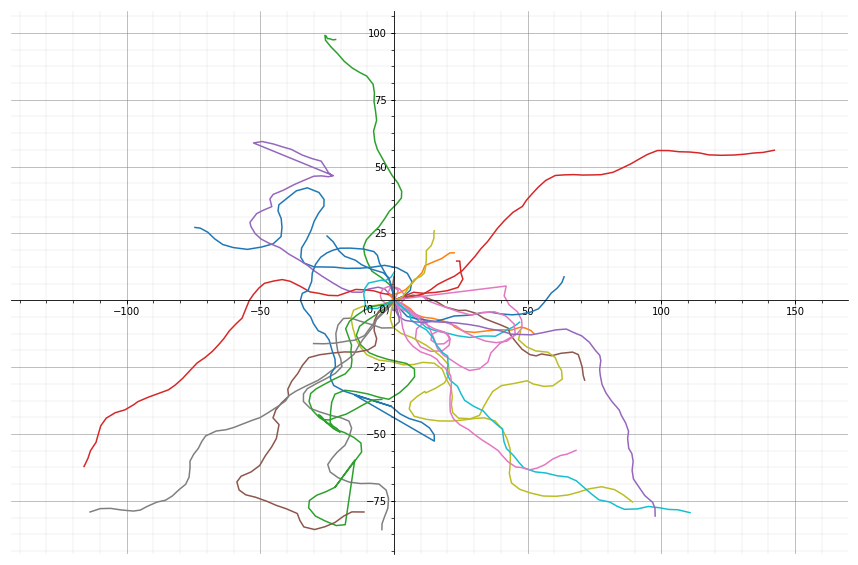

In [102]:
track_ids = BridgeLib.GetItemTrackIds(vSpot)
arr = BridgeLib.GetItemXYZT(vImaris,vSpot,physdim=True)

fig, ax = plt.subplots(1, 1,figsize=(15,10))

for tid in track_ids:
    idx = BridgeLib.GetItemIds(vSpot,tid)
    #values = subset["Value"][idx]
    #ti = subset["Time"][idx]
    xyzt = arr[BridgeLib.GetItemIds(vSpot,tid)]
    x = xyzt['x'] - xyzt['x'][0]
    y = xyzt['y'] - xyzt['y'][0]

    ax.plot(x,y)

center_spines()
plt.axis('equal')
plt.show()


# Extracting statistics

In [56]:
vStatisticValues = vSpot.GetStatistics()

In [57]:
list_stats = list(set(vStatisticValues.mNames))
list_stats.sort()
print list_stats

['Acceleration', 'Acceleration X', 'Acceleration Y', 'Acceleration Z', 'Area', 'Diameter X', 'Diameter Y', 'Diameter Z', 'Displacement Delta Length', 'Displacement Delta X', 'Displacement Delta Y', 'Displacement Delta Z', 'Displacement X', 'Displacement Y', 'Displacement Z', 'Displacement^2', 'Distance from Origin', 'Distance to Image Border XY', 'Distance to Image Border XYZ', 'Generation', 'Intensity Center', 'Intensity Max', 'Intensity Mean', 'Intensity Median', 'Intensity Min', 'Intensity StdDev', 'Intensity Sum', 'Intensity Sum of Square', 'Number of Spots per Time Point', 'Number of Tracks', 'Position X', 'Position Y', 'Position Z', 'Speed', 'Time', 'Time Index', 'Time Since Track Start', 'Total Number of Spots', 'Track Ar1 Mean', 'Track Ar1 X', 'Track Ar1 Y', 'Track Ar1 Z', 'Track Area Mean', 'Track Diameter Mean', 'Track Displacement Length', 'Track Displacement X', 'Track Displacement Y', 'Track Displacement Z', 'Track Duration', 'Track Intensity Center Mean', 'Track Intensity

# Color coding by TRACK statistics
Here we choose a track statistic such as track length or track straightness and color code each of the tracks accordingly.

In [131]:
statistic_name = "Track Straightness"
subset = BridgeLib.GetStatistics(vStatisticValues,statistic_name)

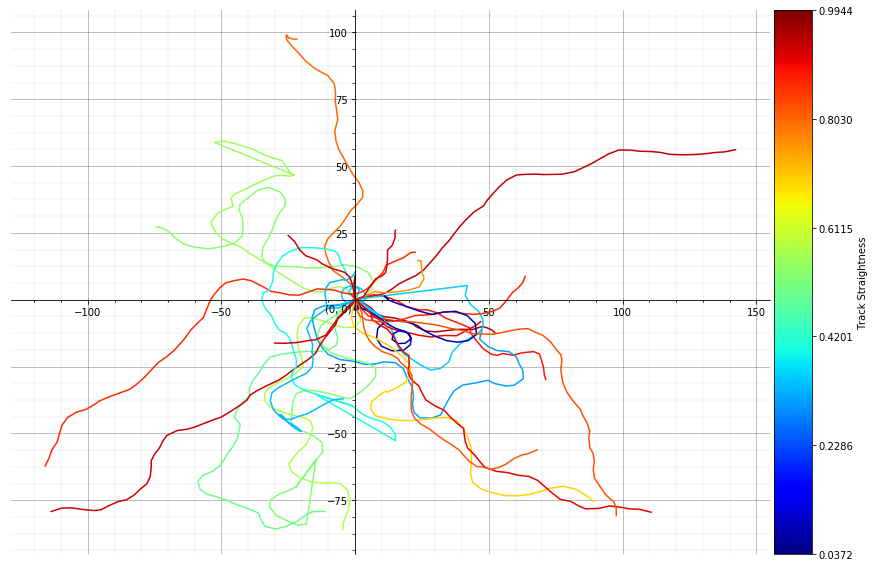

In [132]:
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

track_ids = BridgeLib.GetItemTrackIds(vSpot)
arr = BridgeLib.GetItemXYZT(vImaris,vSpot,physdim=True)

vmi = np.min(subset["Value"])
vma = np.max(subset["Value"])

fig, ax = plt.subplots(1, 1,figsize=(15,10))

cmap = plt.get_cmap('jet') 
norm = colors.Normalize(vmin=vmi, vmax=vma)
parameterToColorBy = np.linspace(vmi, vma, 6, dtype=float)

scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)
scalarMap.set_array([])

for tid in track_ids:
    idx = BridgeLib.GetItemIds(vSpot,tid)
    xyzt = arr[idx]
    
    if not tid in subset["Id"]:
        # This shouldn't happen but still, if don't have a
        # statistics to display, then move on to the next track
        continue
        
    value = subset["Value"][subset["Id"] == tid][0]
    
    x = xyzt['x'] - xyzt['x'][0]
    y = xyzt['y'] - xyzt['y'][0]
    
    col = scalarMap.to_rgba(value)
    line, = ax.plot(x,y,color=col)

center_spines()
plt.axis('equal')

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.05)  

cb = mpl.colorbar.ColorbarBase(ax_cb,
                               cmap=cmap,
                               norm=norm,
                               ticks=parameterToColorBy,
                               orientation='vertical')

cb.set_label(statistic_name)
fig.add_axes(ax_cb)
plt.show()

# Color coding by SPOT statistics
Slightly more complicated, here we choose a spot statistic such as acceleration and color code each of the tracks accordingly.

**TODO:*** There are some statistical values that cannot be mapped back to a spot id. This is annoying but for now can be worked around using numpy.take() with a "wrap" mode. Of course the values are completely wrong, but at least look-up doesn't crash.

So using:
```values = np.take(subset["Value"],idx,mode="wrap")```
instead of:
```values = subset["Value"][idx]```

In [133]:
#https://stackoverflow.com/questions/36074455/python-matplotlib-with-a-line-color-gradient-and-colorbar
    
import matplotlib.collections as mcoll

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

In [129]:
statistic_name = "Speed"
subset = BridgeLib.GetStatistics(vStatisticValues,statistic_name)

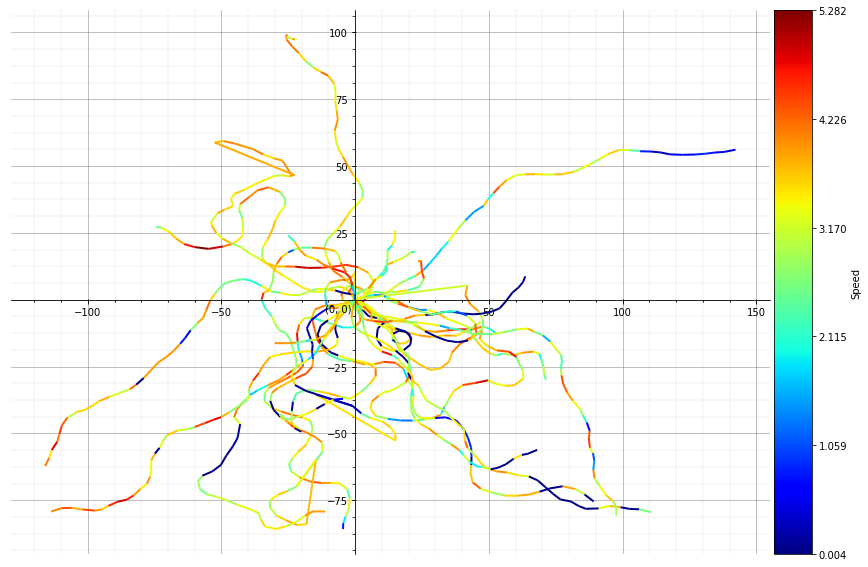

In [130]:
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

track_ids = BridgeLib.GetItemTrackIds(vSpot)
arr = BridgeLib.GetItemXYZT(vImaris,vSpot,physdim=True)

vmi = np.min(subset["Value"])
vma = np.max(subset["Value"])

fig, ax = plt.subplots(1, 1,figsize=(15,10))

cmap = plt.get_cmap('jet') 
norm = colors.Normalize(vmin=vmi, vmax=vma)
parameterToColorBy = np.linspace(vmi, vma, 6, dtype=float)

scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)
scalarMap.set_array([])

for tid in track_ids:
    idx = BridgeLib.GetItemIds(vSpot,tid)
    xyzt = arr[idx]
    
    #TODO! This is wrong, but there are indexes for which a value is not defined.
    #If that's the case, wrap around to at least get a value
    #Speed and Acceleration, because no value for last 1 or 2 points?
    #Solution is to check the subset first maybe...
    #values = subset["Value"][idx]
    values = np.take(subset["Value"],idx,mode="wrap")

    x = xyzt['x'] - xyzt['x'][0]
    y = xyzt['y'] - xyzt['y'][0]

    #print x.shape, y.shape,values.shape
    lc = colorline(x, y, values, cmap=cmap, norm=norm, linewidth=2)

center_spines()
plt.axis('equal')

divider = make_axes_locatable(ax)
ax_cb = divider.new_horizontal(size="5%", pad=0.05)  

cb = mpl.colorbar.ColorbarBase(ax_cb,
                               cmap=cmap,
                               norm=norm,
                               ticks=parameterToColorBy,
                               orientation='vertical')

cb.set_label(statistic_name)
fig.add_axes(ax_cb)
    
plt.show()